In [1]:
import pandas as pd
df = pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [2]:
df.shape

(16000, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [4]:
df.label.value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

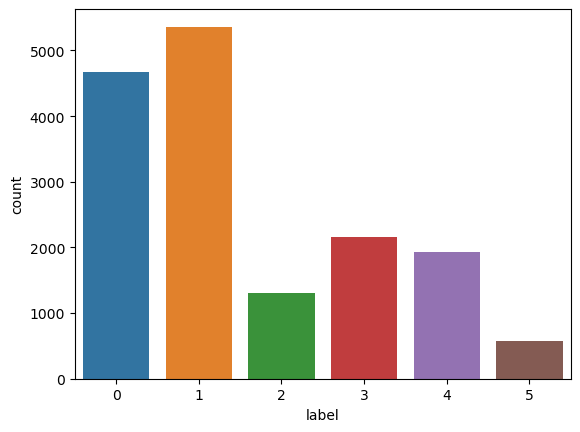

In [5]:
import seaborn as sns
sns.countplot(x=df.label)

In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\nikhil reddy
[nltk_data]     boda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
X = X.toarray()
y = df.label.values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, \
                                                test_size=0.2, shuffle=True)

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 35.0 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)
rf_pred=clf_rf.predict(X_test).astype(int)

In [ ]:
print("Accuracy:",accuracy_score(y_test, rf_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,rf_pred))  
print(classification_report(y_test,rf_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced') 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))